# Test Model _ver 2

In [ ]:
#!git clone https://github.com/Sh41lD4n1n/FederatedLearning

In [ ]:
!pwd

In [ ]:
#/kaggle/input/federatedlearning/FederatedLearning
#/kaggle/working

In [ ]:
import os
os.chdir("/kaggle/input/federatedlearning")

In [ ]:
!pwd

In [ ]:
#!git checkout CNN_model

In [ ]:
import os

os.chdir("./Models/CNN_model")
#!ls
from Model import Model#,Optimizer_SGD
from Data import Data

os.chdir("../..")
!ls

from Models.FederatedLearning.Server import server
from Models.StatisticClass import Statistic,array_mean_object

from Models.Optimizers.Adam import Adam
from Models.Optimizers.OASIS import OASIS

#os.chdir("../Reports")
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
#!ls

In [ ]:
!pwd

In [ ]:
os.chdir("/kaggle/working")

In [ ]:
!pwd

In [ ]:
Data.SPLITS

['het',
 'ident',
 'random_indent',
 'ident_same',
 'noSplit',
 'noSplit_test_split']

## Model

In [15]:
print("train Model")

train Model


In [12]:
d = Data(split = "noSplit",n_workers=1,environment = "kaggle")

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
m = Model("Model_Adam")

m.set_optimizer(optim.Adam(params=m.net.parameters(), lr=0.001, betas=(0.3, 0.58)))

trainloader = d.get_data_loaders()[0]['trainloader']
testloader = d.get_data_loaders()[0]['testloader']

m.run(epoch = 100,train_loader = trainloader,test_loader = testloader)

In [ ]:
print(m.stat_collector.loss[-1])
print(m.stat_collector.accuracy[-1])
m.stat_collector.loss_plot()
m.stat_collector.acc_plot()
m.stat_collector.weight_plot()

In [16]:
m = Model("Model_Adam_impl")

#m.set_optimizer(optim.Adam(params=m.net.parameters(), lr=0.001, betas=(0.3, 0.58)))
m.set_optimizer(Adam(params = m.net.parameters(),beta2 = 0.58,lr=0.001))

trainloader = d.get_data_loaders()[0]['trainloader']
testloader = d.get_data_loaders()[0]['testloader']

m.run(epoch = 100,train_loader = trainloader,test_loader = testloader)

100%|█████████████████████████████████████████| 100/100 [25:06<00:00, 15.07s/it]


0.89386085015309
0.6878


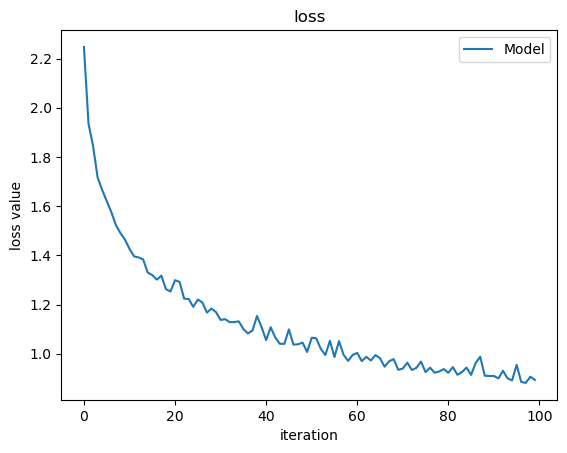

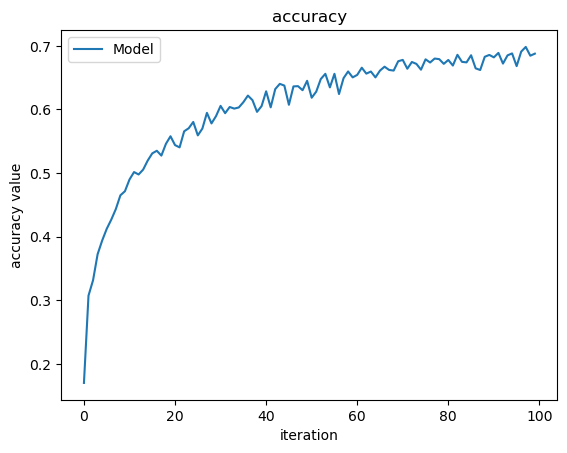

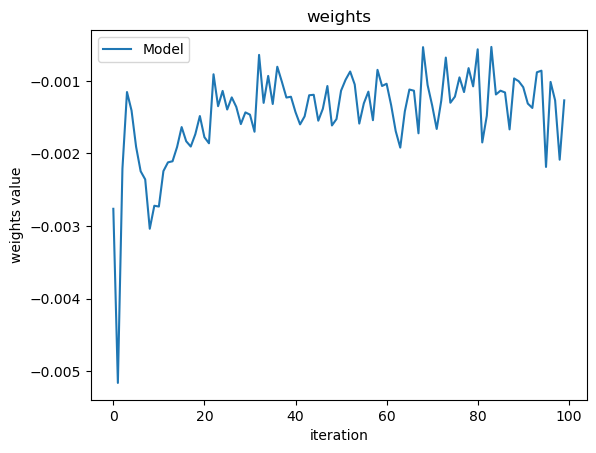

In [17]:
print(m.stat_collector.loss[-1])
print(m.stat_collector.accuracy[-1])
m.stat_collector.loss_plot()
m.stat_collector.acc_plot()
m.stat_collector.weight_plot()

In [18]:
print("train Model")

train Model


## Heterogenious

In [ ]:
def model_creator(w_num):
    name = f"FederatedHetModel_{w_num}"

    model = Model(name)
    #model.set_optimizer(optim.SGD(m.net.parameters(), lr=0.01))
    return model

In [ ]:
d = Data(split = "het",n_workers=3,environment="kaggle")

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=100,T=5)

100%|█████████████████████████████████████████| 100/100 [53:23<00:00, 32.04s/it]


In [ ]:
stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"heterogeneous")

## Federated learning

### Identical split, running with update on each iteration

In [19]:
def model_creator(w_num):
    print(w_num)
    name = f"FederatedModelSingleW_adam_ident_{w_num}_"

    model = Model(name)
    model.set_optimizer(Adam(params = m.net.parameters(),beta2 = 0.58,lr=0.001))
    return model

In [20]:
d = Data(split = "ident",n_workers=1,environment = "kaggle")

Files already downloaded and verified
Files already downloaded and verified


In [22]:
s = server(num_workers=1,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=100,T=1)

0


100%|█████████████████████████████████████████████| 1/1 [00:15<00:00, 15.75s/it]


0.9096972233132471
0.6797


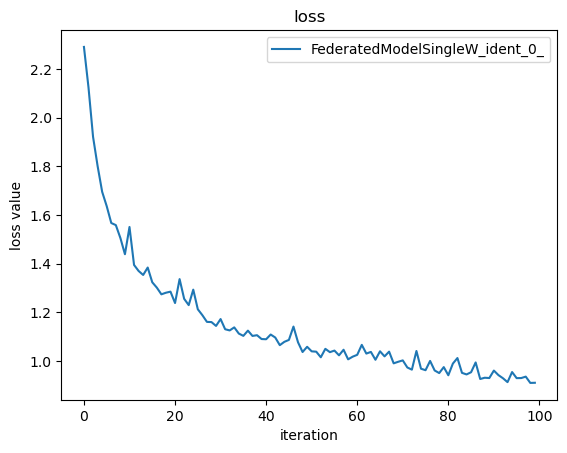

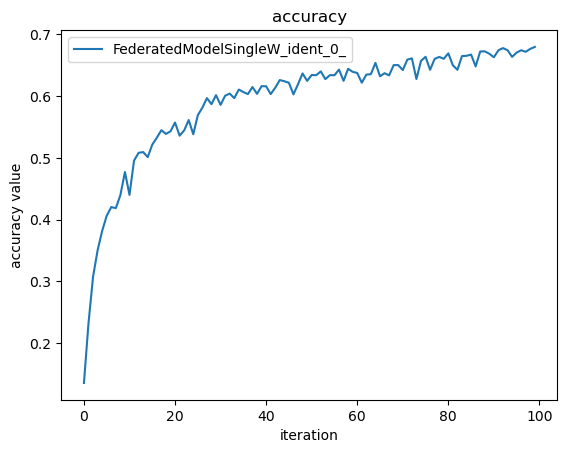

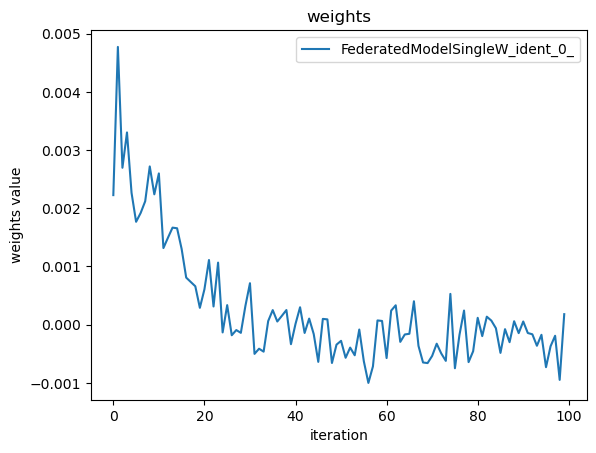

In [23]:
print(s.workers[0].model.stat_collector.loss[-1])
print(s.workers[0].model.stat_collector.accuracy[-1])
s.workers[0].model.stat_collector.loss_plot()
s.workers[0].model.stat_collector.acc_plot()
s.workers[0].model.stat_collector.weight_plot()

### Identical split

In [27]:
print("identical")

identical


In [ ]:
def model_creator1(w_num):
    name = f"FederatedIdentModel_random_noSplit_adam_{w_num}"

    model = Model(name)
    model.set_optimizer(Adam(params = m.net.parameters(),beta2 = 0.58,lr=0.001))
    return model

In [ ]:
def model_creator2(w_num):
    name = f"FederatedIdentModel_ident_same_adam_{w_num}"

    model = Model(name)
    model.set_optimizer(Adam(params = m.net.parameters(),beta2 = 0.58,lr=0.001))
    return model

In [30]:
# def model_creator3(w_num):
#     name = f"FederatedIdentModel_{w_num}"
#     #opt = Optimizer_SGD()
#     preconditioner = None
#     scaller = None

#     model = Model(name)
#     #model.set_optimizer(opt)
#     #model.set_preconditioner(preconditioner)
#     #model.set_scaller(scaller)
#     return model

In [31]:
Data.SPLITS

['het',
 'ident',
 'random_indent',
 'ident_same',
 'noSplit',
 'noSplit_test_split']

In [32]:
d1 = Data(split = "noSplit",n_workers=3,environment = "kaggle")
d2 = Data(split = "ident_same",n_workers=3,environment = "kaggle")
#d3 = Data(split = "ident",n_workers=3,environment = "kaggle")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
data = [d1.get_data_loaders()[0],d1.get_data_loaders()[0],d1.get_data_loaders()[0]]
s = server(num_workers=3,data = data,model_creator=model_creator1)
s.run(n_iter=100,T=5)

stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"FederatedIdentModel_noSplit_adam")

 20%|█████████                                    | 1/5 [00:16<01:05, 16.42s/it]

In [ ]:
print(stat_collector.loss[-1])
print(stat_collector.accuracy[-1])
stat_collector.loss_plot()
stat_collector.acc_plot()

In [ ]:
s = server(num_workers=3,data = d2.get_data_loaders(),model_creator=model_creator2)
s.run(n_iter=100,T=5)

stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"FederatedIdentModel_ident_same_adam")

In [ ]:
print(stat_collector.loss[-1])
print(stat_collector.accuracy[-1])
stat_collector.loss_plot()
stat_collector.acc_plot()

In [ ]:
# s = server(num_workers=3,data = d3.get_data_loaders(),model_creator=model_creator3)
# s.run(n_iter=100,T=5)

# stat_collectors = [w.model.stat_collector for w in s.workers]
# stat_collector = array_mean_object(stat_collectors,"FederatedIdentModel_ident")

In [ ]:
# print(stat_collector.loss[-1])
# print(stat_collector.accuracy[-1])
# stat_collector.loss_plot()
# stat_collector.acc_plot()

### Heterogenious

In [ ]:
def model_creator(w_num):
    name = f"FederatedHetModel_adam_{w_num}"
    model = Model(name)
    
    model.set_optimizer(Adam(params = m.net.parameters(),beta2 = 0.58,lr=0.001))
    return model

In [ ]:
d = Data(split = "het",n_workers=3,environment="kaggle")

In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=100,T=5)

In [ ]:
stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"heterogeneous_adam")